On cartalk show #1952 (https://www.npr.org/2019/12/23/790760300/-1952-blow-it-out) starting at 7:30 until 12:00 a truck driver named Ray was delivering frozen turkey wings. 
He said he had a broken gas gauge. The horizontal cylinder tank was 20" in diameter
and he marked the dowel at 0 for empty, 10" for half full, and 20" for full. How,
he wondered, should he mark the 1/4 and 3/4 marks? Intuition told him it wasn't going
to be at 5" and 15" because the gas tank has a circular cross-section. It's funny listening to Tom and Ray who at first think it's a simple problem. How do you divide that half circle? Ray evenytually gets to the fact that it is a calculus problem. This notebook will show how to do the integration to figure out the partial area of a circle. This will be proportional to the gas tank level.

The very next week in reprise show #2001 [https://www.npr.org/2020/01/02/793000937/-2001-thats-worth-needlepoint] the car guys are back on the gas tank problem starting at 0:30. They predict 5.96" for 1/4 full with a 20" diameter tank which I agree is the correct answer. They used a graphing calculator that gives the area under a curve. Tommy mentioned mathworld.com and mathforum.com

Here is a brilliant solution suggested by Tim Sierra:
1. Take a full beer can.
2. Pour equal amounts into 4 identically shaped glasses.
3. Dring 3 of the containes.
4. Pour the remaining 1/4 back into the beer can and tip it on it's side
5. Cut a little hole in the side of the can and insert straw
6. Mark where the straw intersects the top of the can
7. Take the straw out and mark the top of the wet spot.
8. The relative distances can be used to figure out the height of 1/4 full.

An article by Brett Allain on the Wired Magazine website inspired me to repeat some of the steps he described in : https://www.wired.com/2010/11/car-talk-cylindrical-fuel-tank-problem/

The cylindrical tank will have volume proportional to the area of the circle. To find the area of the circle below any horizontal fluid level it is necessary to integrate the equation for a circle along the y-axis from [-R, R].

In [1]:
import numpy as np                     # for dealing with numeric arrays 
import sympy as sp                     # for symbolic integration 
from matplotlib import pyplot as plt   # for making pretty charts
from math import asin, sqrt, pi        # asin is arcsin the inverse of the sin function
from scipy.integrate import quad       # for numerical integration 
from fractions import Fraction         # used to convert 0.125 to 1/8 


How to mark the dip stick to show fuel levels of (1/4,1/2,3/4)?


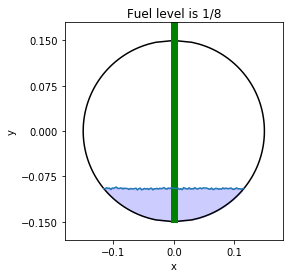

In [3]:
# We start by drawing a picture of tank cross section
# A circle with the dip stick gives the picture

import numpy as np
import matplotlib.pyplot as plt

# 
# Equation of a circle
# x^2 + y^2 = R^2
# The plan is to integrate the area of the circle along the y-axis

# x = sqrt(R^2 - y^2)
N = 101
R = 0.15 # we can scale our circle to any value

y = np.linspace(-R, R, num=N)  # y is bounded by -R to +R
x = np.sqrt(R*R - y*y)         # get the corresponding x values
                               # the negative square root also exists, but we can use symmmetry to simplify math

fig = plt.figure()
ax = fig.add_subplot(111)
#ax.axis('equal')               # set a square aspect ratio so the plotted circle appears round
ax.set(xlim=[-1.2*R, 1.2*R], ylim=[-1.2*R, 1.2*R], aspect=1)
ax.set_xlabel('x')
ax.set_ylabel('y')


ax.plot(x, y, 'k')
ax.plot(-x, y, 'k')

ystick = np.linspace(-R*31/32,5/4*R,num=100)
xstick = np.linspace(0,0,num=100)
ax.plot(xstick,ystick, 'g',linewidth=7.0)

ax.set_yticks(np.linspace(-R, R, 5))
#ax.grid(linestyle='--')

def xWidth(y) :
    return np.sqrt(R**2 - (y**2))

heights = np.linspace(-R,3*R/4,11)
# This table will be generated later in the document, but we use it here
scale = \
[[0.000,  -0.15000,  -0.14999], \
[0.125,  -0.11250,  -0.09521], \
[0.250,  -0.07500,  -0.06060], \
[0.500,   0.00000,   0.00000], \
[0.625,   0.03750,   0.02965], \
[0.750,   0.07500,   0.06060], \
[0.875,   0.11250,   0.09521], \
[1.000,   0.15000,   0.14999]] 

s = scale[1]      # choose from 0 to 7
yH = s[2]         # this is the third column of numbers (correct marks)
ax.set_title('Fuel level is %s'%(Fraction(s[0])))

xW = xWidth(yH)   # drawing a line across the circle to indicate fuel level

xsection = np.linspace(-xW, xW, num=N)

ysection = np.ones(N)*yH + 0.001*np.random.randn(N)  # make the fluid line "wavy"

ax.plot(xsection,ysection)

plt.fill_between(x,ysection,y,where=(ysection > y),color='b',alpha=.2)
plt.fill_between(-x,ysection,y,where=(ysection > y),color='b',alpha=.2)

print('How to mark the dip stick to show fuel levels of (1/4,1/2,3/4)?')

plt.show()


### Derivation of the linear model for predicting gas tank volume
##### Easily derived, although keep in mind that it usualy gives erroneous tank volumes!

The linear model for setting the hash marks on our fuel measuring dipstick is easier to derive and use than the exact model which requires integration. However the intuition of our intrepid 18-wheeler truck driver was that the linear markings would give erroneous tank readings. It turns out he is right and we shall see that the linear model will give a 42% under estimation when the tank is 1/8 full. This could lead to some consternation on a dark and stormy night, far away from the next filling station.

Linear equations have a slope multiplied by an independent variable + a scalar intercept.
The slope of our line is just the change in the area over a range of the independent variable, $y$.
The final area occurs when the tank is full. It is just the area of full circle or $\pi R^2$.
The inital area is at the bottom of the tank: empty, nada, 0!

We will construct a linear equation like $A = m*y + b$ by considering how the area of the circle varies at the initial and final and midpoint values of $y$ on $[-R,R]$
the final and initial $y$ values: 
$$y_f = R, y_i = -R$$
the corresponding circular areas:
$$A_f = A(R) = \pi R^2,  A_i = A(-R) = 0$$ 
The slope of line is the change of dependent variable over the change in the indpendent variable.
$$m = \frac{(A_f-A_i)}{(y_f-y_i)} = \frac{(\pi R^2 - 0)}{(R-(-R))} = \frac{(\pi R^2)}{(2 R)} = \frac{\pi R}{2}$$
The  intercept occurs at the midpoint of the circle where $y = 0$. At the middle of the tank we find intercept, $b$ corresponding to the area of a semicircle 
$$b = \frac{\pi R^2}{2}$$
$$A = m y + b = \frac{\pi R}{2} y + \frac{\pi R^2}{2}$$

Because we only want the fractional capacity, divide by the area of circle, $\pi R^2$

So, the linear equation for finding the fractional capacity of the fuel tank for any height $y$ is:
$$A = \frac{1}{2 R} y + 0.5$$
We can easily invert this and find the $y$ value associated with any desired fuel tank fraction.
To do this solve for y with A is the independent variable:
$$(A - 0.5) = \frac{1}{2 R} y$$
$$y = 2 R (A - 0.5)$$



We wish to use a dip stick to measure the fuel left in a horizontal cylindrical tank.
The correct dip stick hash marks require integration of the equation for a circle along the y-axis.
To do this we need to find the partial area of a circle beneath any height $y$.
 
The equation of circle centered at $[0,0]$ is $(x^2 + y^2) = R^2$, where $R$ is the radius of the circle. To integrate along the y-axis we must first solve this equation for $x$ and make $y$ the independent variable.
Solving for $x$, we get two solutions $x = \sqrt{R^2 - y^2}$, and $x = -\sqrt{R^2 - y^2}$. 
Because we are only interested in finding the Area
we can use the symmetry of a circle to justify ignoring the negative square root and doubling the positive square root.
To find the area for any height $y$ between $[-R, R]$, add up slices of area $2 \sqrt{R^2-y^2}*dy$.

Think of these slices at a particular $y$ value with a width of $2 \sqrt{R^2-y^2}$ and height of $dy$. Choose a dy to be something very small like 0.00001 meters. Evidently there will be a LOT of arithmetic. However, computers are very good at repetitive processes.  Even though there thousands of iterations, the calculation of A(yVal) takes less than a second!
 
The function f1R(yVal,R) keeps a running sum these miniscule slices from -R to yVal. It returns the final area divided by the area of a full circle, because we are interested in the fractional capacity of the tank, which will always be a number between 0 and 1.

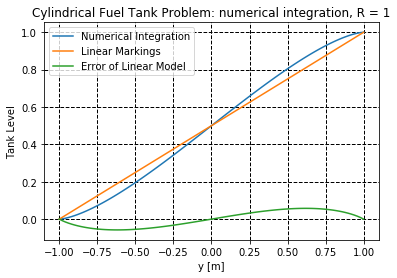

In [5]:
from functools import partial  # solves problem of passing constant R, along with array Y

def f1R(yVal,R) :
    # add up thin slices of the circle to find the Area under yVal
    y = -R       # the integration starting point
    dy = 1.0e-4  # a very small piece of the y axis.
    A = 0
    while (y <= yVal) :           # continue until the specified height is reached
        A=A+2*sqrt(R**2-y**2)*dy  # add another slice of the circle
        y=y+dy                    # make y a little bigger and attempt to add another slice
    # we want tank levels like 1/8, 1/4, ... , 1
    return(A/(pi*R**2)) 

N = 101
R = 1.0
ynum = np.linspace(-R,R,N)              # ynum is an array of N values between -R and R
Anum = list(map(partial(f1R,R=R),ynum)) # Anum is an array of Areas calculated by f1R(yVal,R)
Anum = np.array(Anum)

plt.plot(ynum,Anum,label='Numerical Integration')
plt.xlabel('y [m]')
plt.ylabel('Tank Level')
plt.title('Cylindrical Fuel Tank Problem: numerical integration, R = %g' % R)

def f_LinearR(y,R) :
    return ( 1/(2*R)*y + 0.5 ) # derivation is shown above

# for the same N ynum values, we get linear Areas just for comparison purposes
LinearArea = list(map(partial(f_LinearR,R=R),ynum))
LinearArea = np.array(LinearArea)

plt.plot(ynum, LinearArea,label='Linear Markings') # plot on same graph
Error = Anum - LinearArea                 # What's the difference between the areas?

plt.plot(ynum, Error, label='Error of Linear Model')
plt.legend()
plt.grid(color='k', linestyle='--', linewidth=1)

There are three y values where the linear and numerical integration areas agree:
    1. At the bottom of the tank (when y = -R), both models predict 0 fuel in the tank
    2. At the midpoint of the tank (when y = 0) both models agree on a 1/2 fuel capacity.
    3. At the top of the tank (where y=+R), both agree on a fuel capacity of 1.0
The error of the linear model will be high for small fuel levels, like 1/8 (0.125)
The error is also high for tank lvels in the 5/8 region, but with so much gas in the tank, that will be less of a problem for our over-the-road trucker. 

The numerical integration method works very well for predicting tank levels. However, wouldn't it be nice to have have a closed form equation to do the same thing? Let's try symbolic integration to find an exact expression for finding the partial area of the circle.

It makes the same predictions as our numerical integration predictions.
I used a package called sympy to do symbolic integration.
For a horizontal cylinder, we want an expression to guide us in placing marks on a dip stick 
to indicate fuel levels of 1/8, 1/4, 1/2, 3/4, and 7/8. Call these our "canoncical marks".

Integration is a way to find the area beneath the curve.
A short video tutorial about how to integrate on python: https://www.youtube.com/watch?v=4grhQ5Y_MWo

In [6]:
import sympy as sp

y = sp.Symbol('y')
R = sp.Symbol('R')
f = 2 * sp.sqrt(R**2 - y**2)  # circle equation

f1 = sp.integrate(f,(y))
f1

2*Piecewise((-I*R**2*acosh(y/R)/2 - I*R*y/(2*sqrt(-1 + y**2/R**2)) + I*y**3/(2*R*sqrt(-1 + y**2/R**2)), Abs(y**2/R**2) > 1), (R**2*asin(y/R)/2 + R*y*sqrt(1 - y**2/R**2)/2, True))


In this example
$$f(y) = 2 \sqrt{R^2 - y^2}$$

The integral of $ 2 \sqrt{R^2 - y^2}$ has two piecewise solutions, 
reject the first piecewise integral because $ abs{\frac{y^2}{R^2}} > 1$ refers to negative square roots which occur only when $abs(y) \gt R$. In our case $y$ is in the range $[-R,R]$, so we can go with the other piecewise integral which simplifies to:
$$F(y) = R^2 asin{\frac{y}{R}} + R y \sqrt{1 - \frac{y^2}{R^2}}$$
c1(y) has the indefinite integral. To get the area under a point y, it will be necessary to evaluate AIntegral at the final and intial y values to get the area.
                    
To create a nice expression for calculating the Area below any height $y$ on $[-R,y]$ that does not require knowledge of the fundamental theorem of calculus, we will go to the well of sympy once again. We will evaluate the integral between $-R$ and some unspecified value $Y$.

The area under $f(y)$ is $F(Y) - F(-R)$

In [7]:
# Exact solution, continued

def c1(y) : # using sympy to handle indefinite limit Y
    return(R**2*sp.asin(y/R) + R*y*sp.sqrt(1 - y**2/R**2))

# the area under a curve is equal to integral evaluated at the final point - initial point
Y = sp.Symbol('Y')
R = sp.Symbol('R')

f2 = c1(Y)-c1(-R)
print(f2) # limits of integration are from -R to some unspecified value Y
# result: R**2*asin(Y/R) + pi*R**2/2 + R*Y*sqrt(1 - Y**2/R**2)

R**2*asin(Y/R) + pi*R**2/2 + R*Y*sqrt(1 - Y**2/R**2)


Now we have a closed form expression to calculate the partial circular area under any height Y between $[-R,R]$
$$F(Y) - F(-R) = R^2 asin\frac{Y}{R} + \pi \frac{R^2}{2} + R Y \sqrt{1 - \frac{Y^2}{R^2}}$$

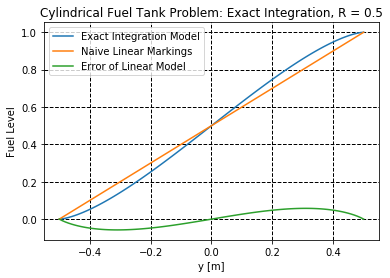

In [8]:
from functools import partial  # solves problem of passing constant R, along with array Y

from math import asin, pi, sqrt

def c2R(Y,R):
    # We just want the fractional area of circle, so divide by pi R^2
    return((R**2*asin(Y/R) + pi*R**2/2 + R*Y*sqrt(1 - Y**2/R**2))/(pi*R**2))
    
N = 101

R = 0.5
yvals = np.linspace(-R, R, N)      # N equispaced values between [-R, R], inclusive

AExact = list(map(partial(c2R, R=R), yvals))
AExact = np.array(AExact)      

plt.xlabel('y [m]')
plt.ylabel('Fuel Level')
plt.title('Cylindrical Fuel Tank Problem: Exact Integration, R = %g' % R)

def f_LinearR(y,R) :
    return ( 1/(R*2)*y + 0.5 )

NaiveLinearArea = list(map(partial(f_LinearR,R=R),yvals))
NaiveLinearArea = np.array(NaiveLinearArea)

Error = AExact - NaiveLinearArea

plt.plot(yvals,AExact, label='Exact Integration Model')
plt.plot(yvals, NaiveLinearArea,label='Naive Linear Markings')
plt.plot(yvals, Error, label='Error of Linear Model')

plt.legend()

plt.grid(color='k', linestyle='--', linewidth=1)

We get the same plot as we did with the numerical integration method.
Using a closed form expression uses less computer resources than numerical integration.
It's nice to see that our crude numerical integration approach of adding up slices of the circle along the y-axis generates identical results as the exact integration approach. 

This suggests we're on the right track.

Next we need to use our formula for calculating the area under any y value between [-R,R] to find the y values corresponding to any given tank capacity such as [0, 1/8, 3/8, ..., 1]. You will recall that the linear model made this dirt simple. We started with the linear model area expression of 

$$A = \frac{1}{2 R} y + 0.5$$

Then we used some algebra to make A the independent variable and solved our linear equation for y:

$$y = 2 R (A - 0.5)$$

Why not just solve our exact expression for the partial circular area for Y and we'll be done!

$$A(Y) = R^2 asin\frac{Y}{R} + \pi \frac{R^2}{2} + R Y \sqrt{1 - \frac{Y^2}{R^2}}$$

But wait! This is not always as easy as the linear model. We have that pesky arcsin function in our expression to say nothing about $\sqrt{1 - \frac{Y^2}{R^2}}$. The arcsin is what mathematicians call a transindental function. Such functions don't respond too well to algebraic manipulations. How can we extract that Y and get it over on the left side of the equation? The answer is that we can't. So it will be necessary to plug and chug: put in likely Y values until we find the desired area. The function ASearchR does this very efficiently. Because the area of the circle always increases with increasing y, we say it is "monotonically increasing with Y". So if our guess is too low, we can split the difference and look at a slightly higher value of Y. If our guess is too high, you guessed it, we choose a slightly lower value of Y. In this way it takes only a dozen or so checks to find the correct Y value for any given tank capacity within a tolerance such as 0.000001. 

So that's what's happening in the code below. 

funcR(Y,R) uses the area calculating expression for a given value of Y. R is the radius of the circle, and it only changes when we set up the problem.

ASearchR() (with a few arguments documented in the code below) calls funcR over and over again until it finds an area sufficently close to the area under consideration. Between each call the result is checked and compared to the requested capacity. 


In [9]:
from math import asin, sqrt, pi

# This part addresses how we can use our tools of predicting partial ares to come up
# with hash mark settings for the measuring stick.
# We now have an exact formula for calculating the Area of a circle for y between [-R,R]
# The exact solution can be searched to find the y value for any desired gas gauge level.
# 

def funcR(Y,R) : 
    # By integrating the equation describing a circle along the y axis
    # We have a formula to calculate the area of the circle to any desired accuracy
    # You may wonder why we didn't merely solve for Y, and enter the Area as a parameter
    # The asin function is a transcendal function so algebraic manipulation is not possible
    # We can probe it with various values of Y to see which one results in the desired area. 
    A = (R**2*asin(Y/R) + pi*R**2/2 + R*Y*sqrt(1 - Y**2/R**2))
    return(A/(pi*R**2))

def f_LinearR(y,R) :
    return ( 1/(R*2)*y + 0.5 )

# We know our formula for the Area is monotonically increases with y
# Therefore we can efficiently find any area to any level of accuracy
# Parameters:
# f is the function that returns an area measurement for a y value
# min is the lowest level of the circle. It will be -R
# max is the highest level of the circle. It will be +R
# key is the level of gas in the tank. It will range from 0 to 1.
# eps stands for epsilon. The search will continue until the Area found is within eps of the key
def ASearchR(f,R,min,max,key,eps) :
    count = 1
    var = (max + min) / 2
    #ans = func(var)
    ans = f(var,R)
    while ( abs(ans - key) > eps and count < 100 ) :
        ans = f(var,R)
        if (ans < key) :
            min = var
        elif ( ans > key ) :
            max = var
        else :
            break
        var = (max + min) / 2
        count = count+1
        #print(key,ans,min,max,var,count)
    #return([var,count])
    return(var)

R = 0.15 # The radius of the circle in meters. Any positive radius value should work
marks = np.linspace(0,1,9)
print ('Tank Radius = %g' % R)
print(' Level   Linear Mark  Exact Mark    (Mark + R)/D')
for m in marks :
    min = -R
    max = R
    key = 0.25
    eps = 1e-6
    #y, count = ASearchR(funcR,R,min,max,m,eps) 
    y = ASearchR(funcR,R,min,max,m,eps)
    #yLin, countLin = ASearch(f_Linear,min,max,m,eps)
    # The linear formula for finding the area is area = 1/(2*R)^y + 0.5
    # we can make Area the independent variable through algebraic manipulation
    # This yields the y value for any given tank capacity
    # We can't flip the integral because of the pesky arcsin bit
    yLin = (m - 0.5)*(2*R)
    
    # R has been added to the y value to shift the range from [-R,R] to the more practical [0,2*R]
    # The Error refers to the error resulting from using a Linear model
    # Tries is the number of searches of the function to find the level
    #print('%4.3f  %8.3f  %8.3f  %8.3f   %4d   %4d' % (m, (y+R)/(2*R), (yLin+R)/(2*R), 100.*abs(func(yLin)-m), count, countLin))
    
    print('[%4s,%12.5f,%12.5f,%12.5fxD'%(Fraction(m),yLin,y,(y+R)/(2*R)))

Tank Radius = 0.15
 Level   Linear Mark  Exact Mark    (Mark + R)/D
[   0,    -0.15000,    -0.14999,     0.00003xD
[ 1/8,    -0.11250,    -0.09521,     0.18263xD
[ 1/4,    -0.07500,    -0.06060,     0.29801xD
[ 3/8,    -0.03750,    -0.02965,     0.40118xD
[ 1/2,     0.00000,     0.00000,     0.50000xD
[ 5/8,     0.03750,     0.02965,     0.59882xD
[ 3/4,     0.07500,     0.06060,     0.70199xD
[ 7/8,     0.11250,     0.09521,     0.81737xD
[   1,     0.15000,     0.14999,     0.99997xD


The Exact and Linear scales agree for tank levels of 0, 1/2, and full.
The linear marks differ from the exact marks for all other fuel levels.
To mark a dipstick multiple the last column by D, the diameter of the tank.

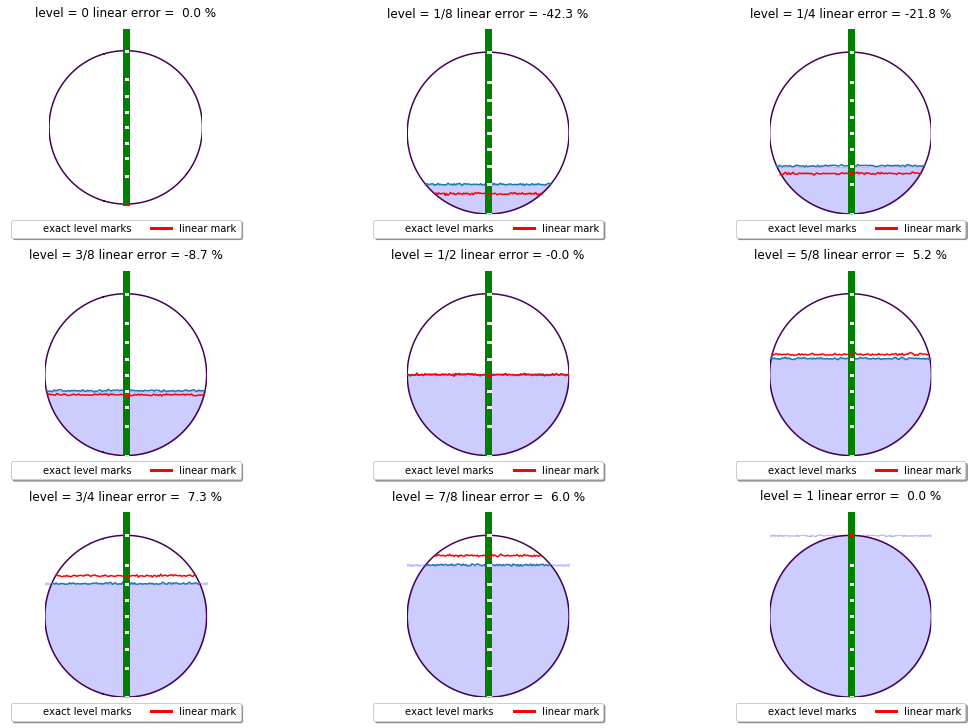

In [10]:
# Here we draw some fuel tanks at each of our canonical fuel levels

import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi, asin
from fractions import Fraction 

R = 0.15
N = 101
x = np.linspace(-R, R, N)
y = np.linspace(-R, R, N)
X, Y = np.meshgrid(x,y)
F = X**2 + Y**2 - R**2

def xWidthR(y, R) :  # used to get the proper width for various y values
    return np.sqrt(R*R - (y**2))

'''
Just for reference, we are going to do the calculation
# level     linear       exact
scale = \
[[0.000,  -0.15000,  -0.14999], \
[0.125,  -0.11250,  -0.09521], \
[0.250,  -0.07500,  -0.06060], \
[0.500,   0.00000,   0.00000], \
[0.625,   0.03750,   0.02965], \
[0.750,   0.07500,   0.06060], \
[0.875,   0.11250,   0.09521], \
[1.000,   0.15000,   0.14999] \
]
'''
tankLevels = np.linspace(0,1,9)    # our canonical fuel gauge levels
#print(tankLevels)
    
levels = []
# generate the table shown above
for level in tankLevels :
    linLevel = (level - 0.5)*2*R
    exactLevel = ASearchR(funcR,R,-R,R,level,1e-6) # use the exact formula to find y val
    levels.append([level,linLevel,exactLevel])

#print (levels)

rows=3
cols=3

fig, axes = plt.subplots(ncols=cols,nrows=rows, constrained_layout=True,figsize=(15,10))

for i, ax in enumerate(axes.flatten()):
    
    ax.set( aspect=1)
    ax.axis('off')
    
    ax.contour(X,Y,F,[0])  # our meshgrid parameters calculated befor
     
    level = levels[i]
    if ( i >= rows*cols ) :
        continue

    # draw a wavy line corresponding to the exact fluid level   
    yH = level[2]
    xW = xWidthR(yH,R)
    xsection = np.linspace(-xW, xW, num=N)
    ysection = np.ones(N)*yH + 0.001*np.random.randn(N)
    ax.plot(xsection,ysection)

    # show the level of the incorrect Linear marking
    yHLin = level[1]
    xWLin = xWidth(yHLin)
    xLinSection = np.linspace(-xWLin, xWLin, num=N)
    yLinSection = np.ones(N)*yHLin + 0.001*np.random.randn(N)
    ax.plot(xLinSection,yLinSection, color='red') 
    y = np.linspace(-R, R, num=N)  # y is bounded by -R to +R
    x = np.sqrt(R*R - y*y)

    # find the difference between the areas from the exact and linear scale model
    if ( round(funcR(yH,R),3)== 0) :
        diff = 0  # avoid problems with division by a miniscule denominator
    else :
        # error relative to the current level
        diff = -100*(funcR(yH,R) - funcR(yHLin,R))/funcR(yH,R) 
        
    ax.set_title('level = %s linear error = %4.1f %%'%(Fraction(level[0]),diff))
    #print('%6.3f  %6.3f  %6.3f   %6.3f   %6.3f' % 
    #(level[0],funcR(yH,R),funcR(yHLin,R),funcR(yH,R) - funcR(yHLin,R),diff))

    # simulate liquid
    ax.fill_between(x,ysection,y,where=(ysection > y),color='b',alpha=.2)
    ax.fill_between(-x,ysection,y,where=(ysection > y),color='b',alpha=.2)

    # here's our simulated dip stick
    ystick = np.linspace(-R*31/32,5/4*R,num=N)
    xstick = np.linspace(0,0,num=N)
    ax.plot(xstick,ystick, 'g',linewidth=7.0)

    # Create grad marks on the fuel gauge
    xhash = np.linspace(0,R/50,num=10)
    labels = False 
    for h in levels :
        yhashExact = np.ones(10)*h[2]
        yhashLinear = np.ones(10)*yHLin
        if ( labels == False ) :
            ax.plot(xhash, yhashExact, 'w', linewidth = 3, label = 'exact level marks')
            labels = True 
        else :
            ax.plot(xhash, yhashExact, 'w', linewidth = 3)

        if ( h[0] == level[0] ) :
            ax.plot(xhash, yhashLinear, 'r', linewidth = 3, label = 'linear mark')
        
        ax.legend(loc='lower center', bbox_to_anchor=(0.5, -R),
          ncol=3, fancybox=True, shadow=True)
        #if i == 8:
            #ax.annotate("Bug", xy=(R, 6*R),  xytext=(R, 4*R),
            #            arrowprops=dict(arrowstyle="->",connectionstyle="angle3,angleA=0,angleB=-90"))
            #ax.annotate('bug in plotfill!', xy=(1, 1), xytext=(10, 4),
            #arrowprops=dict(facecolor='black', shrink=0.05))

#print('Level  Linear  Exact')
#for lev in levels :
#    print('%5s %6.3f %6.3fD'%(Fraction(lev[0]),(lev[1]+R)/(2*R),(lev[2]+R)/(2*R)))     

In [11]:
from math import sqrt, pi

def AddSlices(yVal,R) :
    #if ( yVal < -R or yVal > R) :
    #    return(-1)
    # Crude numerical approach to the integration problem.
    # It works pretty darned well and is easier to understand than the exact result.
    # We are adding up tiny slices of the circle from y = -R to yVal
    # dy and R are constants. Only y gets updated. 
    # the "width" of each slice is 2*sqrt(R**2-y**2)
    # The slices get wider and wider in the range of y = [-R, 0].
    # The widths then decrease towards 0 as y increase over the range of [0,R]
    
    y = -R
    dy = 1.0e-4
    A = 0
    while (y <= yVal) :
        A=A+2*sqrt(R**2-y**2)*dy
        y=y+dy
    return(A/(pi*R**2))

This is just a short sojourn to demonstrate that the binary search in ASearchR works 
just as well with numerical integration as it does for the exact integral. It works
because the area always increases with increasing Y. The fact that the area is monotonically increasing makes searching easy to do. Nevertheless I am surprised at how fast all that plugging and chugging takes place. Computers have gotten so fast in recent years. I'm having an OK, Boomer moment I guess. 

In [12]:
from math import asin, sqrt, pi

from fractions import Fraction # For converting fractions to strings.

R = 0.15
level = AddSlices(0,R)
y = 0 # midpoint of the circle should be half a tank
print('testing AddSlices: for y = %g, level = %g. Expect 0.5' % (y, level))

eps = 1e-4
key = 1/8 # looking for y value associated with 1/8 of a tank
yVal = ASearchR(AddSlices,R,-R,R,key,eps)
print('Testing ASearchR with AddSlices: yVal = %g Expect -0.09521'% yVal)

tankLevels = np.linspace(0,1,9)
#print(tankLevels)
print('  level     linear   numIntegration exactIntegral  Marki Scale 20" Diam Tank')
for key in tankLevels :
    linY  = (key - 0.5)*2*R                    # easy, but sadly, the wrong model
    numY = ASearchR(AddSlices,R,-R,R,key,eps)  # numerical integration
    exactY = ASearchR(funcR,R,-R,R,key,eps)    # closed form integral
    #A = (R**2*asin(Y/R) + pi*R**2/2 + R*Y*sqrt(1 - Y**2/R**2))
    print('%8s  %10.6f   %10.6f   %10.6f   %10.6fD  %10.6f' % \
          ( Fraction(key), linY, numY, exactY, (exactY+R)/(2*R), 20*(exactY+R)/(2*R) ) )


testing AddSlices: for y = 0, level = 0.500209. Expect 0.5
Testing ASearchR with AddSlices: yVal = -0.0952 Expect -0.09521
  level     linear   numIntegration exactIntegral  Marki Scale 20" Diam Tank
       0   -0.150000    -0.149854    -0.149854     0.000488D    0.009766
     1/8   -0.112500    -0.095200    -0.095068     0.183105D    3.662109
     1/4   -0.075000    -0.060600    -0.060608     0.297974D    5.959473
     3/8   -0.037500    -0.029626    -0.029626     0.401245D    8.024902
     1/2    0.000000    -0.000000     0.000000     0.500000D   10.000000
     5/8    0.037500     0.029626     0.029626     0.598755D   11.975098
     3/4    0.075000     0.060600     0.060608     0.702026D   14.040527
     7/8    0.112500     0.095200     0.095068     0.816895D   16.337891
       1    0.150000     0.149854     0.149854     0.999512D   19.990234
